In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import subprocess


In [3]:
key_order = ['def_80_256_1','def_80_512_1','def_80_1024_1','std_62_2048_1']

rmse = lambda x: (x**2).mean()**0.5


### Timing and precision for bootstrap of numbers


In [4]:
#np.random.uniform(-1.95,1.95,64).round(2)
#np.random.uniform(-1.95,1.95,8).round(2)
#np.random.normal(0.0,0.4,512).clip(-1,1).round(2)
!cat atan_neuron_1024_log.txt | grep '^keys' | tail


keys/def_80_1024_1/sk0_LWE.json 2 6 6 12 -0.08786430304133079 7 9 55034879 2477 268713 2 -0.9028957663644324 0.00000000000002131888415801697 43 21 6 ok
keys/def_80_1024_1/sk0_LWE.json 2 6 6 12 0.42107988985413114 7 9 55034879 2333 258510 2 -0.5901920147000517 0.00000000000002131888415801697 43 21 7 ok
keys/def_80_1024_1/sk0_LWE.json 2 6 6 13 -0.07131985255820852 7 9 55034879 2248 257462 2 -0.3745779053053866 0.00000000000002131888415801697 43 21 0 ok
keys/def_80_1024_1/sk0_LWE.json 2 6 6 13 -0.7922436362952548 7 9 55034879 2265 258736 2 -0.6513818231427801 0.00000000000002131888415801697 43 21 1 ok
keys/def_80_1024_1/sk0_LWE.json 2 6 6 13 -0.5874214797070367 7 9 55034879 2245 274977 2 -0.8513422558649685 0.00000000000002131888415801697 43 21 2 ok
keys/def_80_1024_1/sk0_LWE.json 2 6 6 13 0.6071070175669971 7 9 55034879 2385 267327 2 -0.5862303593944513 0.00000000000002131888415801697 43 21 3 ok
keys/def_80_1024_1/sk0_LWE.json 2 6 6 13 -0.9278609995986185 7 9 55034879 2360 269150 2 -0.93

In [23]:
#// output: sk_path prec add_padd mul_padd out_padd value base_log level 
#// load_time, enc_time, exc_time, dec_time, answer, v1, n1, s1, label, status

#temp = subprocess.getoutput("cat atan_neuron_1024_log.txt | grep '^keys'") + "\n" \
#     + subprocess.getoutput("cat atan_neuron_512_log.txt | grep '^keys'") #+ "\n" \
temp = subprocess.getoutput("cat atan_neuron_2048_log.txt | grep '^keys'") + "\n" \
     + subprocess.getoutput("cat atan_neuron_1024_log.txt | grep '^keys'")

# print(temp)

def splitter(test):
    tmp = test.split()
    tst = tmp[0].split("/")[1:2]
    tst += tmp[1:]
    return tst

#len(splitter(temp.split("\n")[0]))

df = pd.DataFrame([splitter(line) for line in temp.split("\n")], 
    columns=["key", "prec", "add_padd", "mul_padd", "out_padd", "value", "base_log", "level",
    "load_time", "enc_time", "exc_time", "dec_time", "answer", "v1", "n1", "s1", "label","status"]) 
df["answer"] = df["answer"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["add_padd"] = df["add_padd"].apply(int)
df["mul_padd"] = df["mul_padd"].apply(int)
df["out_padd"] = df["out_padd"].apply(int)
df["prec"] = df["prec"].apply(int)
df["value"] = df["value"].apply(float)
df["base_log"] = df["base_log"].apply(int)
df["level"] = df["level"].apply(int)
df["load_time"] = df["load_time"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["exc_time"] = df["exc_time"].apply(lambda a: np.nan if a=="N/A" else float(a)/1e6)
df["v1"] = df["v1"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["n1"] = df["n1"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["s1"] = df["s1"].apply(lambda a: np.nan if a=="N/A" else float(a))
df["label"] = df["label"].apply(int)
df["error"] = df["answer"] - df["value"]
df["flag"] = df["answer"].apply(lambda x: np.nan if np.isnan(x) else 1)
#df["ind"] = (0*df["prec"] + df["padd"] + df["base_log"])*df["flag"]

print(df.key.unique())

df = df[df.status=="ok"]

df.head()


['std_62_2048_1' 'def_80_1024_1']


,key,prec,add_padd,mul_padd,out_padd,value,base_log,level,load_time,enc_time,exc_time,dec_time,answer,v1,n1,s1,label,status,error,flag
3456,std_62_2048_1,2,1,3,1,-0.149049,3,5,120696852.0,186,0.703071,4,-0.165250,0.000163,60.0,4.0,0,ok,-0.016201,1.0
3457,std_62_2048_1,2,1,3,1,-0.363879,3,5,120696852.0,148,0.700266,4,-0.315895,0.000163,60.0,4.0,1,ok,0.047984,1.0
3458,std_62_2048_1,2,1,3,1,-0.435792,3,5,120696852.0,158,0.736999,4,-0.494026,0.000163,60.0,4.0,2,ok,-0.058233,1.0
3459,std_62_2048_1,2,1,3,1,0.405325,3,5,120696852.0,157,0.701204,5,0.368767,0.000163,60.0,4.0,3,ok,-0.036557,1.0
3460,std_62_2048_1,2,1,3,1,-0.451367,3,5,120696852.0,154,0.685757,4,-0.392769,0.000163,60.0,4.0,4,ok,0.058597,1.0


In [24]:
df[df.key == "def_80_1024_1"].pivot_table(values="error", index=["add_padd","mul_padd","out_padd"], 
    columns=["base_log","level"], aggfunc="mean").T


add_padd               1                                                    \
mul_padd               3                                                 4   
out_padd              1         2         3         4         5         1    
base_log level                                                               
3        4     -0.045404       NaN       NaN       NaN       NaN -0.149545   
         5      0.015844 -0.016517 -0.017083 -0.061537       NaN -0.017583   
         6     -0.007540 -0.007378  0.016014  0.002951  0.037010  0.008118   
         7      0.018838 -0.005017 -0.014224  0.001084  0.019135  0.005456   
         8      0.007759  0.002597 -0.003487 -0.003731  0.014324 -0.005864   
         9     -0.010787 -0.002260  0.021066 -0.005316 -0.008099  0.013103   
4        3     -0.085001       NaN       NaN       NaN       NaN  0.094515   
         4     -0.008517 -0.002774  0.006255 -0.055620 -0.079968 -0.002698   
         5      0.001923  0.013770  0.008037 -0.007556 -0.011496  0.005339   
         6     -0.001885 -0.017795  0.000943  0.021605  0.003383  0.024880   
         7      0.015999 -0.002257 -0.009496  0.009934  0.022813  0.014882   
         8     -0.009744  0.009546  0.017740  0.001773 -0.003111 -0.004243   
         9     -0.001999 -0.011717  0.002178  0.032058 -0.009230 -0.007105   
5        3     -0.008307 -0.016887  0.013369 -0.061157       NaN  0.003207   
         4     -0.021506  0.027287  0.016541 -0.006210  0.009287 -0.003496   
         5     -0.001638 -0.010493  0.009742 -0.002125  0.020105  0.005982   
         6      0.010571 -0.000978  0.023518 -0.005213  0.002386 -0.000960   
         7      0.006920  0.005452 -0.011653 -0.000983 -0.000267 -0.005938   
         8      0.006742 -0.003804  0.000520  0.008176 -0.007345 -0.010605   
         9     -0.014631  0.007924 -0.002319  0.014774  0.007905 -0.009386   
6        3     -0.006075 -0.005549  0.000438  0.006845 -0.005733  0.011613   
         4     -0.003249 -0.001548 -0.000044  0.004248  0.010801 -0.006844   
         5     -0.017859 -0.029564  0.001049 -0.007801  0.009548 -0.009005   
         6      0.005133  0.008993  0.000263  0.029819 -0.000800  0.006072   
         7      0.001529  0.011081  0.006140 -0.002892 -0.007448 -0.007795   
         8      0.010377  0.006515 -0.013243  0.004172  0.010983 -0.002510   
         9     -0.004460  0.015102  0.012550  0.025214 -0.012509 -0.007765   
7        3     -0.001505 -0.014109  0.000378 -0.006277  0.003514  0.000615   
         4     -0.007767  0.001101  0.021526 -0.005113  0.012316 -0.013498   
         5      0.014075 -0.003276  0.007149  0.002334 -0.001483 -0.021134   
         6     -0.007884  0.010073 -0.004047 -0.001642  0.015024 -0.003129   
         7     -0.005824  0.015905  0.007483  0.010807  0.010536 -0.017722   
         8      0.022682 -0.035213  0.004030 -0.011664 -0.007805  0.002044   
         9      0.031351  0.002344  0.009666  0.006033  0.017286  0.018988   

add_padd                                                ...         6  \
mul_padd                                                ...         6   
out_padd              2         3         4         5   ...        4    
base_log level                                          ...             
3        4           NaN       NaN       NaN       NaN  ...       NaN   
         5      0.004411  0.020509  0.007849       NaN  ... -0.167493   
         6     -0.009126  0.008403  0.001971 -0.032149  ...  0.333830   
         7      0.010111  0.004168 -0.002143 -0.008627  ... -0.098676   
         8     -0.015403  0.000448 -0.006740  0.012747  ... -0.146378   
         9      0.007378  0.020266 -0.007674 -0.010516  ...  0.295198   
4        3           NaN       NaN       NaN       NaN  ...       NaN   
         4     -0.007956  0.004986 -0.016097 -0.014922  ... -0.213528   
         5     -0.010449 -0.013677  0.000676  0.002032  ... -0.191827   
         6     -0.004783  0.002583  0.009837 -0.002644  ...  0.296227   
         7   

In [7]:
df[df.key == "def_80_1024_1"].pivot_table(values="error", index=["add_padd","mul_padd","out_padd"], 
    columns=["base_log","level"], aggfunc=rmse).T


add_padd               1                                                    \
mul_padd               3                                                 4   
out_padd              1         2         3         4         5         1    
base_log level                                                               
3        4      0.132206       NaN       NaN       NaN       NaN  0.252018   
         5      0.053487  0.057684  0.064809  0.143424       NaN  0.031781   
         6      0.034140  0.042616  0.039664  0.034227  0.065120  0.032782   
         7      0.032432  0.035618  0.017362  0.045536  0.045373  0.029106   
         8      0.033658  0.026625  0.025775  0.037874  0.024663  0.020834   
         9      0.050492  0.024119  0.036688  0.046561  0.033740  0.032304   
4        3      0.203741       NaN       NaN       NaN       NaN  0.290501   
         4      0.042495  0.043978  0.084743  0.091805  0.221613  0.026838   
         5      0.048813  0.026745  0.025996  0.045987  0.048707  0.032961   
         6      0.034799  0.047634  0.024963  0.035141  0.045610  0.031862   
         7      0.054164  0.036400  0.033634  0.034128  0.045517  0.028111   
         8      0.033604  0.038791  0.026432  0.033166  0.026323  0.038091   
         9      0.030315  0.049252  0.034677  0.055441  0.044269  0.037642   
5        3      0.058753  0.054266  0.139271  0.262963       NaN  0.030855   
         4      0.039499  0.038238  0.049219  0.030393  0.037482  0.036342   
         5      0.036059  0.032783  0.024275  0.059904  0.040834  0.025865   
         6      0.038788  0.030877  0.037588  0.028058  0.054204  0.026017   
         7      0.031476  0.028731  0.027003  0.032951  0.029364  0.023406   
         8      0.033931  0.036910  0.032755  0.033141  0.047639  0.028286   
         9      0.029716  0.036316  0.022002  0.041911  0.052158  0.040426   
6        3      0.044740  0.047881  0.028556  0.031701  0.026401  0.038335   
         4      0.046436  0.044061  0.036294  0.050745  0.036221  0.021791   
         5      0.046370  0.043950  0.034911  0.022104  0.017426  0.032821   
         6      0.039866  0.041136  0.027367  0.047937  0.025615  0.034197   
         7      0.046973  0.030237  0.013695  0.034683  0.027905  0.021125   
         8      0.029748  0.038904  0.032056  0.037270  0.038249  0.019860   
         9      0.044288  0.046366  0.049243  0.038637  0.030238  0.032516   
7        3      0.042596  0.038905  0.047109  0.051413  0.023503  0.024941   
         4      0.043935  0.026651  0.040029  0.046403  0.023050  0.031694   
         5      0.061404  0.034707  0.036408  0.023634  0.048737  0.033059   
         6      0.034394  0.034343  0.038492  0.032225  0.030102  0.030901   
         7      0.033094  0.023178  0.050632  0.055316  0.050748  0.051985   
         8      0.033736  0.044165  0.045748  0.029193  0.035382  0.029653   
         9      0.036322  0.048504  0.033327  0.024060  0.047878  0.044493   

add_padd                                                ...         6  \
mul_padd                                                ...         6   
out_padd              2         3         4         5   ...        4    
base_log level                                          ...             
3        4           NaN       NaN       NaN       NaN  ...       NaN   
         5      0.070342  0.092674  0.155635       NaN  ...  0.457920   
         6      0.043058  0.040849  0.043994  0.068261  ...  0.604788   
         7      0.035667  0.033362  0.035774  0.042318  ...  0.631961   
         8      0.026666  0.056211  0.058541  0.024446  ...  0.496931   
         9      0.023144  0.039074  0.036993  0.042800  ...  0.442471   
4        3           NaN       NaN       NaN       NaN  ...       NaN   
         4      0.029688  0.074406  0.091562  0.178523  ...  0.607192   
         5      0.031028  0.020255  0.034516  0.036665  ...  0.450708   
         6      0.034186  0.035127  0.019653  0.016839  ...  0.425015   
         7   

In [8]:
df[df.key == "def_80_1024_1"].pivot_table(values="exc_time", index=["add_padd","mul_padd","out_padd"], 
    columns=["base_log","level"], aggfunc="mean").T


add_padd               1                                                    \
mul_padd               3                                                 4   
out_padd              1         2         3         4         5         1    
base_log level                                                               
3        4      0.151556       NaN       NaN       NaN       NaN  0.143791   
         5      0.193419  0.185708  0.193589  0.173003       NaN  0.170746   
         6      0.202649  0.205042  0.196395  0.204940  0.194607  0.195409   
         7      0.221858  0.216572  0.220982  0.220815  0.229358  0.239825   
         8      0.254467  0.250012  0.258730  0.257537  0.263757  0.260290   
         9      0.274256  0.283540  0.283466  0.282989  0.273882  0.279412   
4        3      0.124134       NaN       NaN       NaN       NaN  0.118884   
         4      0.142428  0.142550  0.146089  0.145385  0.144230  0.148236   
         5      0.167087  0.171588  0.174225  0.164882  0.170968  0.169938   
         6      0.186459  0.189626  0.197848  0.194764  0.192436  0.203402   
         7      0.237148  0.227000  0.223771  0.225986  0.226922  0.223141   
         8      0.248761  0.249722  0.257149  0.258416  0.252446  0.250117   
         9      0.262250  0.270216  0.272983  0.268758  0.264371  0.265454   
5        3      0.140957  0.127494  0.141421  0.119623       NaN  0.117185   
         4      0.152361  0.142611  0.146762  0.143085  0.146357  0.141408   
         5      0.170880  0.172345  0.188367  0.181261  0.175621  0.170074   
         6      0.189877  0.198443  0.194125  0.200116  0.205913  0.206921   
         7      0.223604  0.221049  0.229498  0.231141  0.237182  0.224410   
         8      0.254506  0.256872  0.253869  0.249251  0.260576  0.249691   
         9      0.277502  0.271365  0.281846  0.302727  0.274469  0.268238   
6        3      0.121865  0.121498  0.122260  0.123340  0.125676  0.115952   
         4      0.153704  0.154658  0.177122  0.148067  0.147949  0.141849   
         5      0.177994  0.174933  0.173328  0.172977  0.174064  0.173397   
         6      0.202991  0.207501  0.199073  0.194111  0.195360  0.200617   
         7      0.224247  0.241486  0.238891  0.244889  0.270047  0.221443   
         8      0.259340  0.257111  0.245230  0.267584  0.252702  0.249635   
         9      0.267404  0.278343  0.281958  0.332540  0.269050  0.278962   
7        3      0.130336  0.121137  0.124085  0.122530  0.120273  0.124169   
         4      0.155338  0.156084  0.152329  0.154759  0.151243  0.150629   
         5      0.168639  0.172722  0.177770  0.177735  0.173632  0.171004   
         6      0.195175  0.203776  0.199052  0.201634  0.195018  0.202745   
         7      0.226593  0.232673  0.222718  0.234231  0.231668  0.223631   
         8      0.243951  0.249620  0.253139  0.251636  0.257607  0.246836   
         9      0.275529  0.283302  0.276529  0.275789  0.272751  0.263834   

add_padd                                                ...         6  \
mul_padd                                                ...         6   
out_padd              2         3         4         5   ...        4    
base_log level                                          ...             
3        4           NaN       NaN       NaN       NaN  ...       NaN   
         5      0.167933  0.163809  0.163069       NaN  ...  0.171904   
         6      0.198296  0.198050  0.197750  0.189137  ...  0.197460   
         7      0.231799  0.227301  0.232843  0.221102  ...  0.216891   
         8      0.263044  0.260923  0.259745  0.253617  ...  0.259096   
         9      0.288338  0.278083  0.278440  0.286732  ...  0.291109   
4        3           NaN       NaN       NaN       NaN  ...       NaN   
         4      0.155445  0.158773  0.147149  0.145862  ...  0.147437   
         5      0.170339  0.168930  0.175652  0.174209  ...  0.184725   
         6      0.195459  0.204551  0.198813  0.196150  ...  0.198297   
         7   

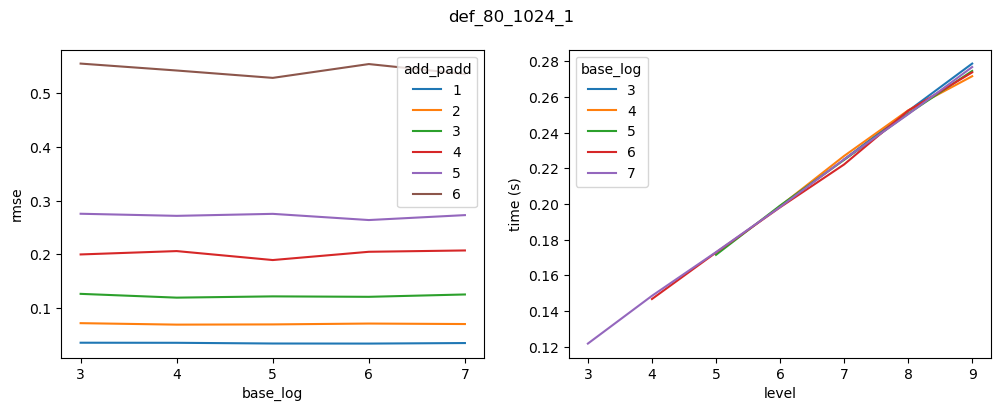

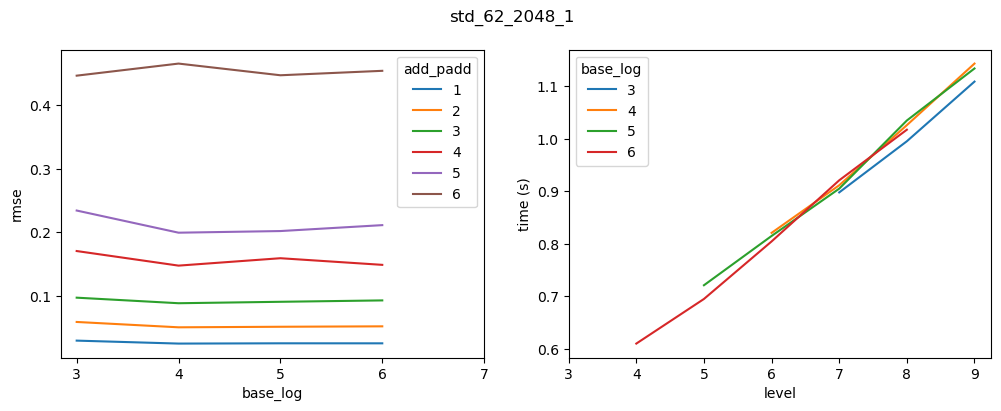

In [25]:
th = 10

for key in key_order[2:]:
    idx = (df.key == key)&(df.base_log+df.level>=th)
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    df[idx].pivot_table(values="error", index=["add_padd"], 
        columns=["base_log"], aggfunc=rmse).T.plot(ax=axs[0], xticks=df.base_log.unique())
    axs[0].set_ylabel("rmse")
    df[idx].pivot_table(values="exc_time", index=["level"], 
        columns=["base_log"], aggfunc="mean").plot(ax=axs[1], xticks=df.level.unique())
    axs[1].set_ylabel("time (s)")
    plt.suptitle(key)
    plt.show()


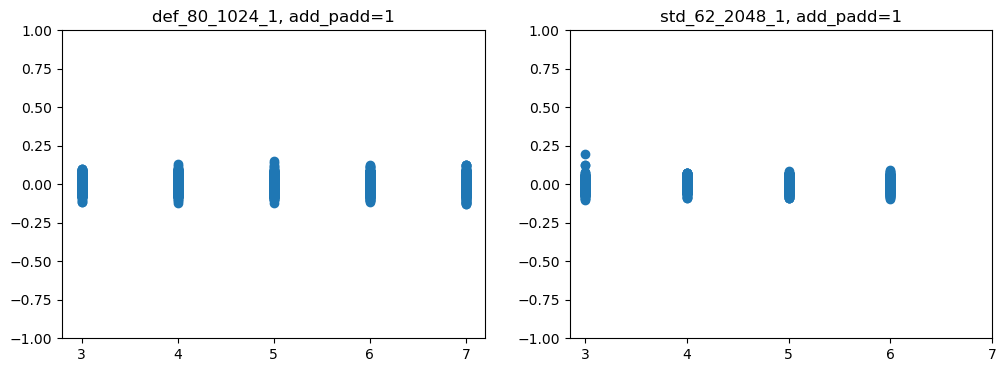

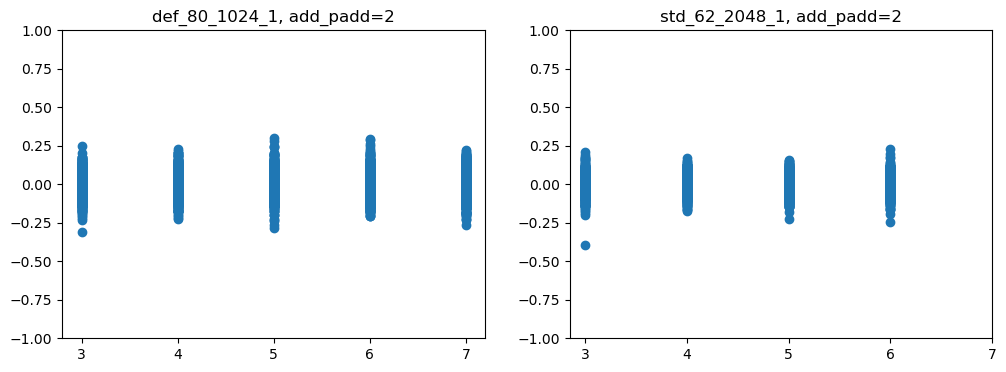

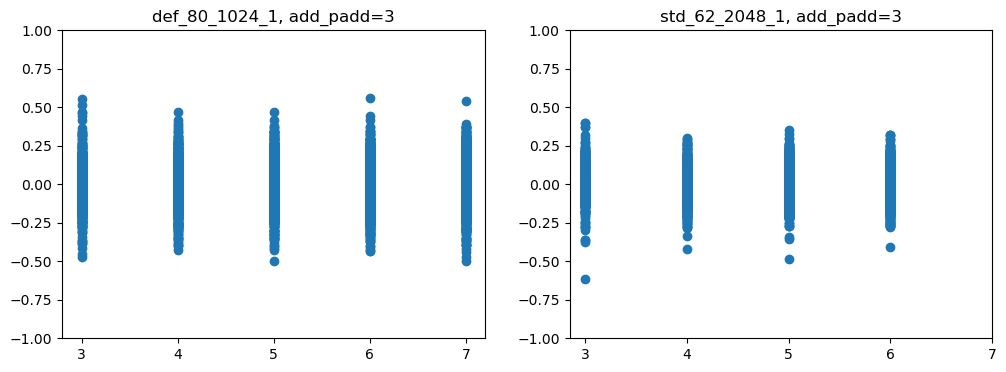

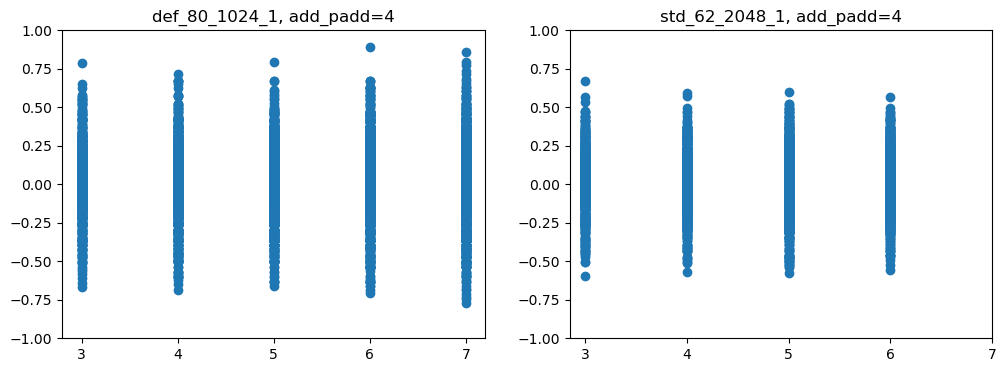

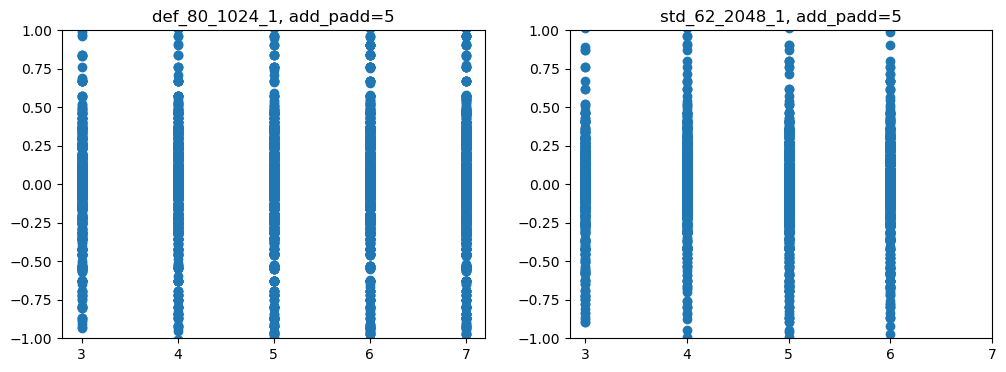

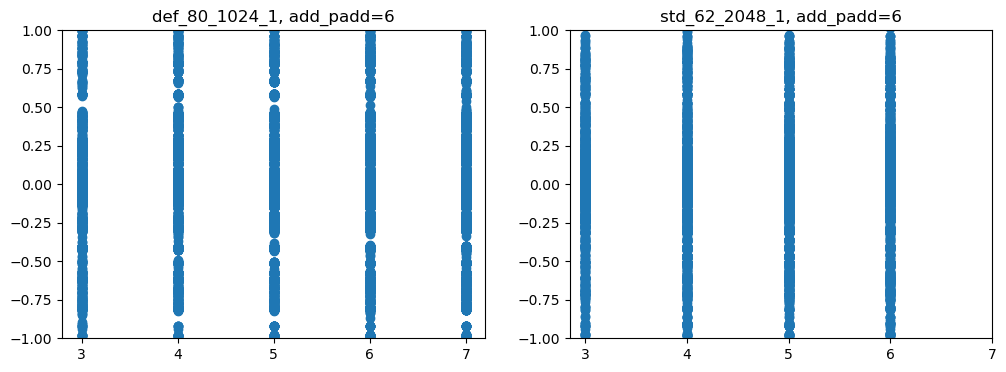

In [26]:
th = 10

for j in df.add_padd.unique():
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    for i, key in enumerate(key_order[2:]):
        idx = (df.key == key)&(df.add_padd==j)&(df.base_log+df.level>=th)
        axs[i].scatter(df.loc[idx,"base_log"],df.loc[idx,"error"])
        axs[i].set_title(f"{key}, add_padd={j}")
        axs[i].set_ylim([-1,1])
        axs[i].set_xticks(df.base_log.unique())
    plt.show()


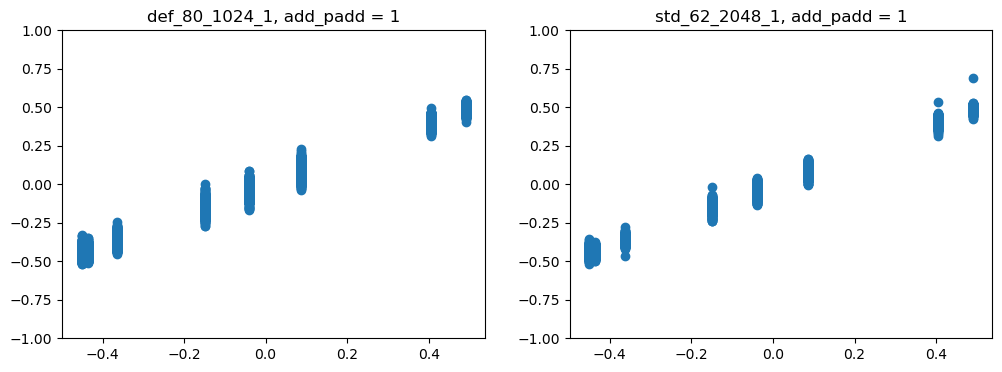

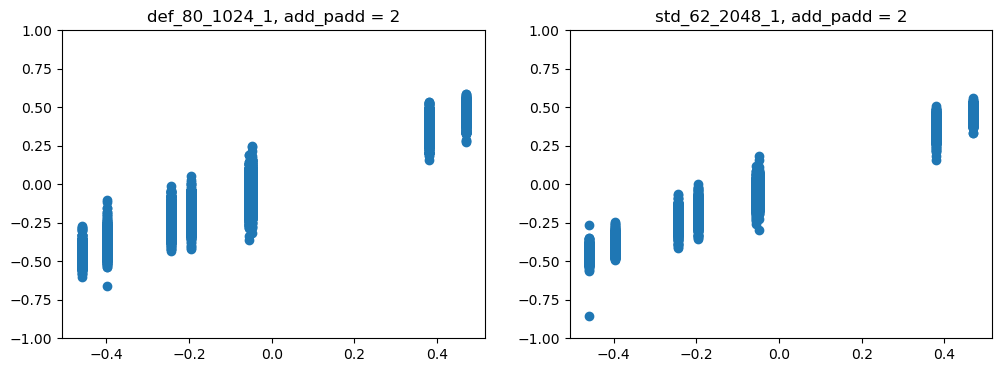

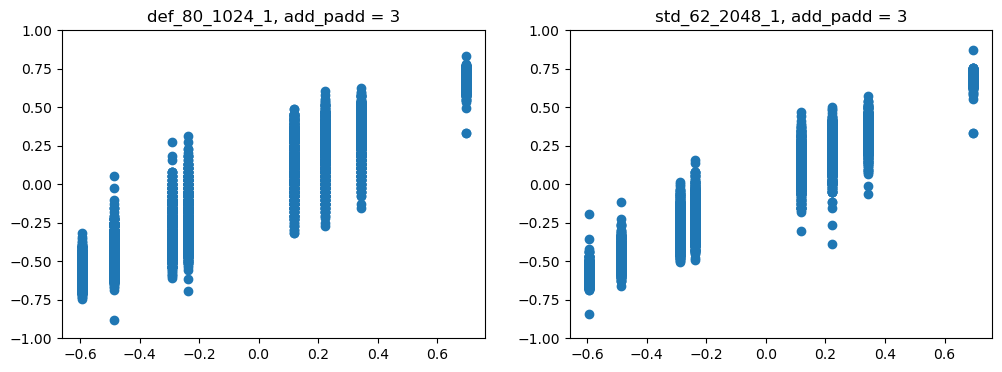

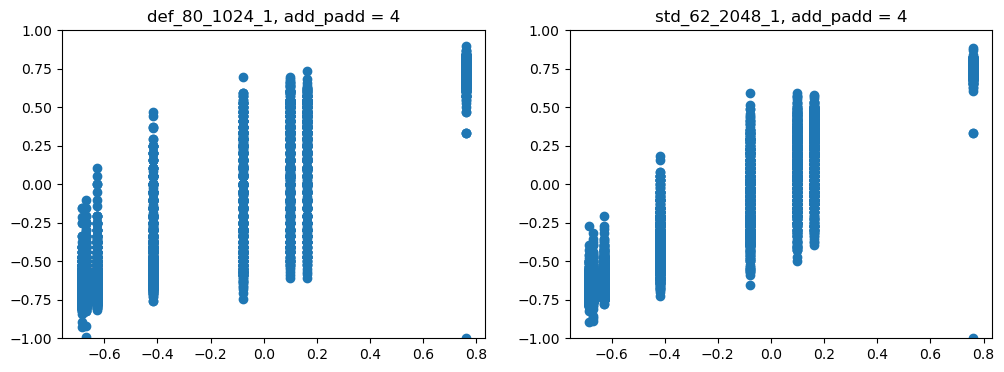

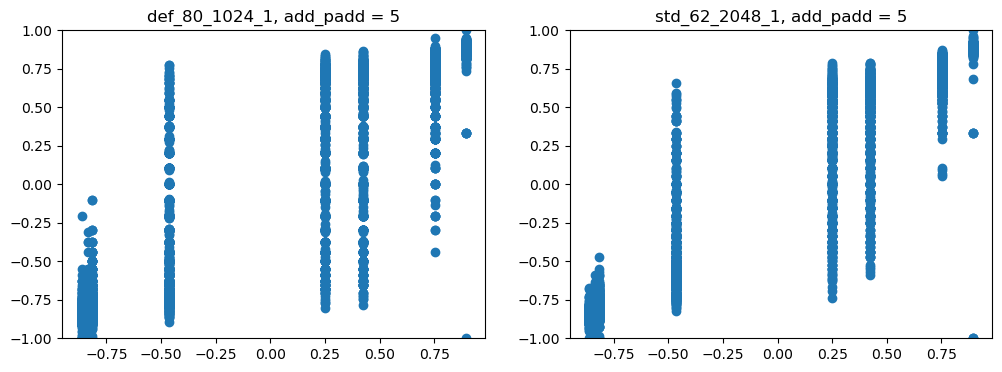

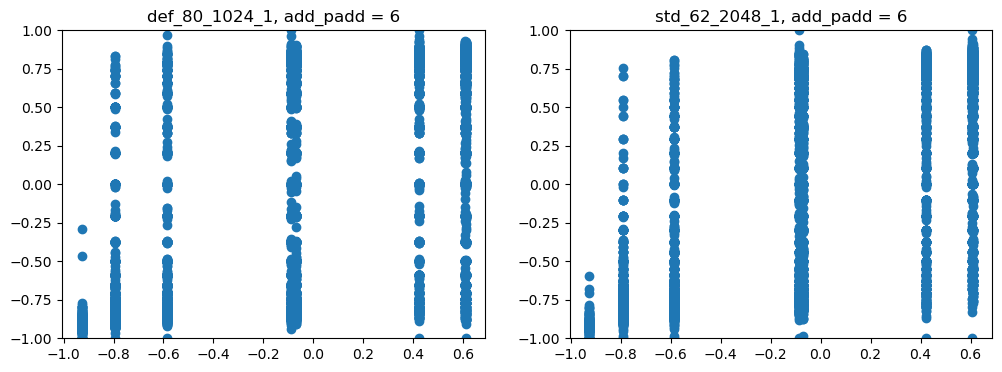

In [29]:
th = 10

for j in df.add_padd.unique():
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    for i, key in enumerate(key_order[2:]):
        idx = (df.key == key)&(df.add_padd==j)&(df.base_log+df.level>=th)
        axs[i].scatter(df.loc[idx,"value"],df.loc[idx,"answer"])
        axs[i].set_title(f"{key}, add_padd = {j}")
        axs[i].set_ylim([-1,1])
    plt.show()
